In [164]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import KFold
from sklearn.linear_model import Ridge as Ridge_Reg
from sklearn.linear_model import Lasso as Lasso_Reg
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor as RandomForest
from sklearn.model_selection import train_test_split as sk_split
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
% matplotlib inline
from rdkit import Chem
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem import rdmolfiles
import random
import matplotlib.tri as mtri

# Feature Engineering

In [ ]:
"""
Read in train and test as Pandas DataFrames
"""
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [ ]:
df_train.head()

In [ ]:
df_test.head()

In [ ]:
print df_train.shape
print df_test.shape

In [ ]:
# drop the ID column in test set
df_test = df_test.drop(['Id'], axis=1)
# drop the gap column in test set
#df_train = df_train.drop(['gap'], axis=1)

In [ ]:
# df for feature engineering
df_all = pd.concat((df_train, df_test), axis=0, ignore_index=True)

In [ ]:
smiles_mod = pd.DataFrame([rdmolfiles.MolFromSmiles(df_all.smiles[i]) for i in range(df_all.shape[0])])

In [ ]:
df_all['newfeat_01'] = pd.Series(smiles_mod[0].apply(lambda x: rdMolDescriptors.CalcNumAromaticRings(x))
                                , index=smiles_mod.index)
df_all['newfeat_02'] = pd.Series(smiles_mod[0].apply(lambda x: rdMolDescriptors.CalcExactMolWt(x))
                                , index=smiles_mod.index)
df_all['newfeat_03'] = pd.Series(smiles_mod[0].apply(lambda x: rdMolDescriptors.CalcNumAliphaticCarbocycles(x))
                                , index=smiles_mod.index)
df_all['newfeat_04'] = pd.Series(smiles_mod[0].apply(lambda x: rdMolDescriptors.CalcNumAliphaticHeterocycles(x))
                                , index=smiles_mod.index)
df_all['newfeat_05'] = pd.Series(smiles_mod[0].apply(lambda x: rdMolDescriptors.CalcNumAliphaticRings(x))
                                , index=smiles_mod.index)
df_all['newfeat_06'] = pd.Series(smiles_mod[0].apply(lambda x: rdMolDescriptors.CalcNumAmideBonds(x))
                                , index=smiles_mod.index)
df_all['newfeat_07'] = pd.Series(smiles_mod[0].apply(lambda x: rdMolDescriptors.CalcNumAromaticCarbocycles(x))
                                , index=smiles_mod.index)
df_all['newfeat_08'] = pd.Series(smiles_mod[0].apply(lambda x: rdMolDescriptors.CalcNumAromaticHeterocycles(x))
                                , index=smiles_mod.index)
df_all['newfeat_09'] = pd.Series(smiles_mod[0].apply(lambda x: rdMolDescriptors.CalcNumAromaticRings(x))
                                , index=smiles_mod.index)
df_all['newfeat_10'] = pd.Series(smiles_mod[0].apply(lambda x: rdMolDescriptors.CalcNumBridgeheadAtoms(x))
                                , index=smiles_mod.index)
df_all['newfeat_11'] = pd.Series(smiles_mod[0].apply(lambda x: rdMolDescriptors.CalcNumHeterocycles(x))
                                , index=smiles_mod.index)
df_all['newfeat_12'] = pd.Series(smiles_mod[0].apply(lambda x: rdMolDescriptors.CalcNumRings(x))
                                , index=smiles_mod.index)
df_all['newfeat_13'] = pd.Series(smiles_mod[0].apply(lambda x: rdMolDescriptors.CalcNumRotatableBonds(x))
                                , index=smiles_mod.index)
df_all['newfeat_14'] = pd.Series(smiles_mod[0].apply(lambda x: rdMolDescriptors.CalcNumSaturatedCarbocycles(x))
                                , index=smiles_mod.index)
df_all['newfeat_15'] = pd.Series(smiles_mod[0].apply(lambda x: rdMolDescriptors.CalcNumSaturatedHeterocycles(x))
                                , index=smiles_mod.index)
df_all['newfeat_16'] = pd.Series(smiles_mod[0].apply(lambda x: rdMolDescriptors.CalcNumSaturatedRings(x))
                                , index=smiles_mod.index)

In [ ]:
df_all['newfeat_17'] = pd.Series(df_all['smiles'].apply(lambda x: x.count('c')), index=df_all.index)
df_all['newfeat_18'] = pd.Series(df_all['smiles'].apply(lambda x: x.count('cc')), index=df_all.index)
df_all['newfeat_19'] = pd.Series(df_all['smiles'].apply(lambda x: x.count('C')), index=df_all.index)
df_all['newfeat_20'] = pd.Series(df_all['smiles'].apply(lambda x: x.count('CC')), index=df_all.index)
df_all['newfeat_21'] = pd.Series(df_all['smiles'].apply(lambda x: x.count('C=c')), index=df_all.index)
df_all['newfeat_22'] = pd.Series(df_all['smiles'].apply(lambda x: x.count('cn')), index=df_all.index)
df_all['newfeat_23'] = pd.Series(df_all['smiles'].apply(lambda x: x.count('co')), index=df_all.index)
df_all['newfeat_24'] = pd.Series(df_all['smiles'].apply(lambda x: x.count('C=c12')), index=df_all.index)
df_all['newfeat_25'] = pd.Series(df_all['smiles'].apply(lambda x: x.count('C=c21')), index=df_all.index)
df_all['newfeat_26'] = pd.Series(df_all['smiles'].apply(lambda x: x.count('H')), index=df_all.index)
df_all['newfeat_27'] = pd.Series(df_all['smiles'].apply(lambda x: x.count('e')), index=df_all.index)
df_all['newfeat_28'] = pd.Series(df_all['smiles'].apply(lambda x: x.count('n')), index=df_all.index)
df_all['newfeat_29'] = pd.Series(df_all['smiles'].apply(lambda x: x.count('s')), index=df_all.index)
df_all['newfeat_30'] = pd.Series(df_all['smiles'].apply(lambda x: x.count('o')), index=df_all.index)
df_all['newfeat_31'] = pd.Series(df_all['smiles'].apply(lambda x: x.count('[SiH2]')), index=df_all.index)
df_all['newfeat_32'] = pd.Series(df_all['smiles'].apply(lambda x: x.count('[nH]')), index=df_all.index)
df_all['newfeat_33'] = pd.Series(df_all['smiles'].apply(lambda x: x.count('[se]')), index=df_all.index)
df_all['newfeat_34'] = pd.Series(df_all['smiles'].apply(lambda x: x.count('(=')), index=df_all.index)
df_all['newfeat_35'] = pd.Series(df_all['smiles'].apply(lambda x: x.count('(-')), index=df_all.index)
df_all['newfeat_36'] = pd.Series(df_all['smiles'].apply(lambda x: x.count('[')), index=df_all.index)
df_all['newfeat_37'] = pd.Series(df_all['smiles'].apply(lambda x: x.count('-')), index=df_all.index)
df_all['newfeat_38'] = pd.Series(df_all['smiles'].apply(lambda x: x.count('=')), index=df_all.index)
df_all['newfeat_39'] = pd.Series(df_all['smiles'].apply(lambda x: x.count('1')), index=df_all.index)
df_all['newfeat_40'] = pd.Series(df_all['smiles'].apply(lambda x: x.count('2')), index=df_all.index)
df_all['newfeat_41'] = pd.Series(df_all['smiles'].apply(lambda x: x.count('3')), index=df_all.index)
df_all['newfeat_42'] = pd.Series(df_all['smiles'].apply(lambda x: x.count('4')), index=df_all.index)

In [ ]:
# rdkit gives you 128 fingerprint
df_all.to_csv('output.csv')

In [ ]:
df_all.head()

In [ ]:
df_all.shape

# Feature Retrieval

In [2]:
"""
Read in post-feature-engineering train and test as Pandas DataFrames
"""
df_all = pd.read_csv("output.csv")
df_all.shape

In [3]:
df_all.head()

,Unnamed: 0,smiles,feat_001,feat_002,feat_003,feat_004,feat_005,feat_006,feat_007,feat_008,...,newfeat_33,newfeat_34,newfeat_35,newfeat_36,newfeat_37,newfeat_38,newfeat_39,newfeat_40,newfeat_41,newfeat_42
0,0,c1ccc(o1)-c1ccc(s1)-c1cnc(-c2scc3[se]ccc23)c2n...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1,0,1,1,3,0,6,4,2,0
1,1,C1=CC=C(C1)c1cc2ncc3c4[SiH2]C=Cc4ncc3c2c2=C[Si...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0,0,0,2,0,5,4,6,2,2
2,2,[nH]1c-2c([SiH2]c3cc(-c4scc5C=CCc45)c4nsnc4c-2...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,...,0,0,1,2,3,1,2,5,2,4
3,3,[nH]1c2-c3occc3Cc2c2c1cc(-c1cccc3=C[SiH2]C=c13...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,...,0,0,1,3,2,4,6,6,4,0
4,4,c1cnc2c3oc4cc(-c5ncncn5)c5nsnc5c4c3c3cocc3c2c1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0,0,1,0,1,0,2,2,4,2


In [17]:
df_train = pd.read_csv("train.csv")
gap = df_train['gap']

In [25]:
gap.shape

(1000000,)

# Random Forest

In [4]:
# generic function to plot scores
def plot_CV_scores(score_train, score_test, index, index_label, title):
    fig, ax = plt.subplots(1, 1, figsize=(15, 5))

    ax.scatter(index, score_train, color='red', label='score_train')
    ax.plot(index, score_train, color='red')

    ax.scatter(index, score_test, color='blue', label='score_test')
    ax.plot(index, score_test, color='blue')

    ax.set_xlabel(index_label)
    ax.set_ylabel('Score')
    ax.set_title(title)
    ax.legend()

In [103]:
# Generic function for cross-validation 
def AutoKFold_RF(train_x, train_y, params1, params2, params3):
    #Create a k-folds validation object
    kf = KFold(len(train_x), n_folds=5)
    #Record the mean score for each depth
    score_test = []
    score_train = []
    n = len(train_y)
    #print params1
    #Iterate over the parameters
    for param1 in params1:    
        for param2 in params2:
            for param3 in params3:
                #Record the score for each fold
                valid_score_test = []
                valid_score_train = []
                #print param1
                #Iterate over the folds
                for train_index, test_index in kf:
                    #Split x_train into a train and "test" set
                    x_validate_train, x_validate_test = train_x[train_index], train_x[test_index]
                    y_validate_train, y_validate_test = train_y[train_index], train_y[test_index]

                    model = RandomForest(n_estimators=param1, max_depth=param2, max_features=param3)

                    model.fit(x_validate_train, y_validate_train)

                    #Compute the scores
                    valid_score_test.append(model.score(x_validate_test, y_validate_test))
                    valid_score_train.append(model.score(x_validate_train, y_validate_train))
                #Append the mean scores over the k-folds to score list
                score_test.append(np.mean(valid_score_test))
                score_train.append(np.mean(valid_score_train))

                print ("Trees:", param1, "Max_depth:", param2, "Max_features:", param3,
                       "Testing score:", round(np.mean(valid_score_test), 2), 
                       "Training score:", round(np.mean(valid_score_train), 2))

    return(np.concatenate((score_test, score_train)))


# Feature Cleaning

In [6]:
# Find out the number of uninformative columns (all 0's or all 1's)
max_train = df_all.apply(lambda x: np.max(x), axis = 0)
min_train = df_all.apply(lambda x: np.min(x), axis = 0)

# Find out how many columns that have the same value
sum(max_train == min_train)
# obtain index of single-value columns
idx_drop = []
for i in range(len(max_train)):
    
    if max_train[i] == min_train[i]:
        idx_drop.append(i)

In [102]:
len(idx_drop)

230

In [7]:
# drop single-value columns in dataset
df_all = df_all.drop(df_all.columns[idx_drop], axis=1)

In [52]:
# drop smiles and unnamed column
df_all = df_all.drop(['smiles', 'Unnamed: 0'], axis=1)

In [60]:
# clean data of NaNs and other missing data

# determine which values features have missing data
# it seems that we may have collinearity issues because we have so many predictors, will explore more before dropping
print 'Smiles Missing Data:'
for feature in df_all.columns.values:
    num_nulls = sum(df_all[feature].isnull())
    if num_nulls != 0:
        print ('\t' + feature + ': ' + str(num_nulls) + ', ' + 
               str(round(100 * float(num_nulls) / float(len(df_all[feature])))) + '%')

Smiles Missing Data:


In [53]:
df_all.shape

(1824230, 68)

In [140]:
# re-split the training and testing data
train_length = df_train.shape[0]
df_new_train = df_all.iloc[0:train_length]
df_new_test = df_all.iloc[train_length:]
df_new_train.head()

,feat_001,feat_005,feat_006,feat_007,feat_025,feat_037,feat_044,feat_068,feat_069,feat_072,...,newfeat_33,newfeat_34,newfeat_35,newfeat_36,newfeat_37,newfeat_38,newfeat_39,newfeat_40,newfeat_41,newfeat_42
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1,0,1,1,3,0,6,4,2,0
1,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,...,0,0,0,2,0,5,4,6,2,2
2,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,...,0,0,1,2,3,1,2,5,2,4
3,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0,0,1,3,2,4,6,6,4,0
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,1,0,1,0,2,2,4,2


# Random Forest Tuning

In [167]:
# sample a subset of data to train and cross-validate
# since 1M observations and 300 predictors takes FOREVER to run for each time
n_samp = 100000
sample_index = random.sample(range(0, train_length), n_samp)
df_x = df_new_train.iloc[sample_index]
df_y = np.array(gap[sample_index])

# standardize predictors for ridge regression
df_x = preprocessing.scale(df_x)
        
# Random forest regression with 10,000 observations
n_trees = np.arange(40, 80, 30)  
depths = np.arange(5, 60, 5)
features = np.arange(5, 66, 5)
n_combos = len(n_trees)*len(depths)*len(features)
print 'Number of combos: ', n_combos
scores = AutoKFold_RF(df_x, df_y, n_trees, depths, features)
scores_test = scores[:n_combos]
scores_train = scores[n_combos:]

Number of combos:  286
('Trees:', 40, 'Max_depth:', 5, 'Max_features:', 5, 'Testing score:', 0.58, 'Training score:', 0.58)
('Trees:', 40, 'Max_depth:', 5, 'Max_features:', 10, 'Testing score:', 0.64, 'Training score:', 0.64)
('Trees:', 40, 'Max_depth:', 5, 'Max_features:', 15, 'Testing score:', 0.66, 'Training score:', 0.66)
('Trees:', 40, 'Max_depth:', 5, 'Max_features:', 20, 'Testing score:', 0.67, 'Training score:', 0.67)
('Trees:', 40, 'Max_depth:', 5, 'Max_features:', 25, 'Testing score:', 0.68, 'Training score:', 0.68)
('Trees:', 40, 'Max_depth:', 5, 'Max_features:', 30, 'Testing score:', 0.68, 'Training score:', 0.68)
('Trees:', 40, 'Max_depth:', 5, 'Max_features:', 35, 'Testing score:', 0.68, 'Training score:', 0.68)
('Trees:', 40, 'Max_depth:', 5, 'Max_features:', 40, 'Testing score:', 0.68, 'Training score:', 0.68)
('Trees:', 40, 'Max_depth:', 5, 'Max_features:', 45, 'Testing score:', 0.68, 'Training score:', 0.68)
('Trees:', 40, 'Max_depth:', 5, 'Max_features:', 50, 'Testin

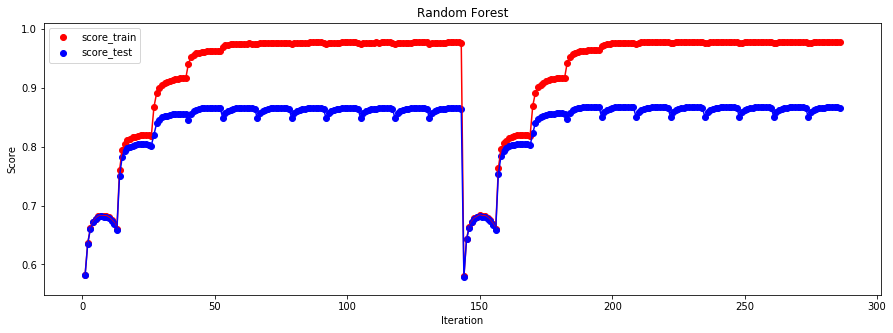

In [168]:
plot_CV_scores(scores_train, scores_test, range(1, n_combos+1), 'Iteration', 'Random Forest')

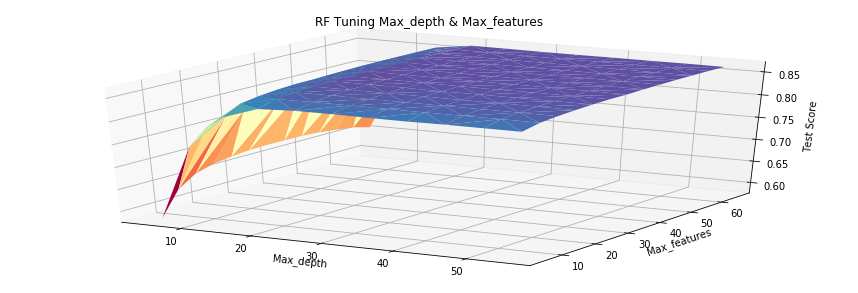

In [169]:
# plot 3D surface of max_depth vs. max_features vs. score 
fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(111, projection='3d')

num_points = len(depths)*len(features)

X = range(0, num_points)
Y = range(0, num_points)
Z = range(0, num_points)
i = 0
for d in depths:
    for f in features:
        X[i] = d
        Y[i] = f
        Z[i] = scores_test[i]
        #ax.scatter(d, f, scores_test[i], c='r', marker='o')
        i = i + 1
        
ax.plot_trisurf(X, Y, Z, cmap=plt.cm.Spectral)
ax.set_title('RF Tuning Max_depth & Max_features')
ax.set_xlabel('Max_depth')
ax.set_ylabel('Max_features')
ax.set_zlabel('Test Score')

plt.show()

# plot average scores given each max_depth, each max_feature

In [89]:
print 'The highest testing CV score is', round(max(scores_test), 2)

The highest testing CV score is 0.87


# Final Random Forest Model & Feature Importance

In [94]:
# Final random forest model
RF = RandomForest(n_estimators=40, max_depth=20, max_features=45)
RF.fit(df_new_train, gap)
training_score = RF.score(df_new_train, gap)
y_pred = RF.predict(df_new_test)
print training_score

0.938813932876


In [95]:
# Feature importance
importances = RF.feature_importances_

Feature ranking:
1. feature feat_025 (0.155945)
2. feature feat_119 (0.135799)
3. feature newfeat_02 (0.091453)
4. feature newfeat_13 (0.086730)
5. feature newfeat_12 (0.045400)
6. feature newfeat_37 (0.041728)
7. feature newfeat_08 (0.037587)
8. feature newfeat_28 (0.033918)
9. feature newfeat_11 (0.032668)
10. feature feat_102 (0.027712)


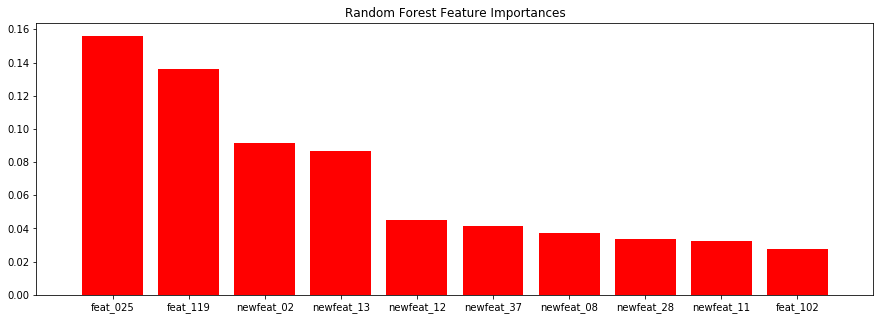

In [131]:
std = np.std([RF.feature_importances_ for tree in RF.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

#for f in range(df_new_train.shape[1]):
# look at top 10 features
for f in range(10):
    print("%d. feature %s (%f)" % (f + 1, df_new_train.columns.values[indices[f]], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure(figsize=(15, 5))
plt.title("Random Forest Feature Importances")
plt.bar(range(10), importances[indices][0:10],
       color="r", yerr=std[indices][0:10], align="center")
plt.xticks(range(10), df_new_train.columns.values[indices])
plt.xlim([-1, 10])
plt.show()

# Write Output

In [99]:
def write_to_file(filename, predictions):
    with open(filename, "w") as f:
        f.write("Id,Prediction\n")
        for i,p in enumerate(predictions):
            f.write(str(i+1) + "," + str(p) + "\n")

In [100]:
write_to_file("sample1.csv", y_pred)
#write_to_file("sample2.csv", RF_pred)